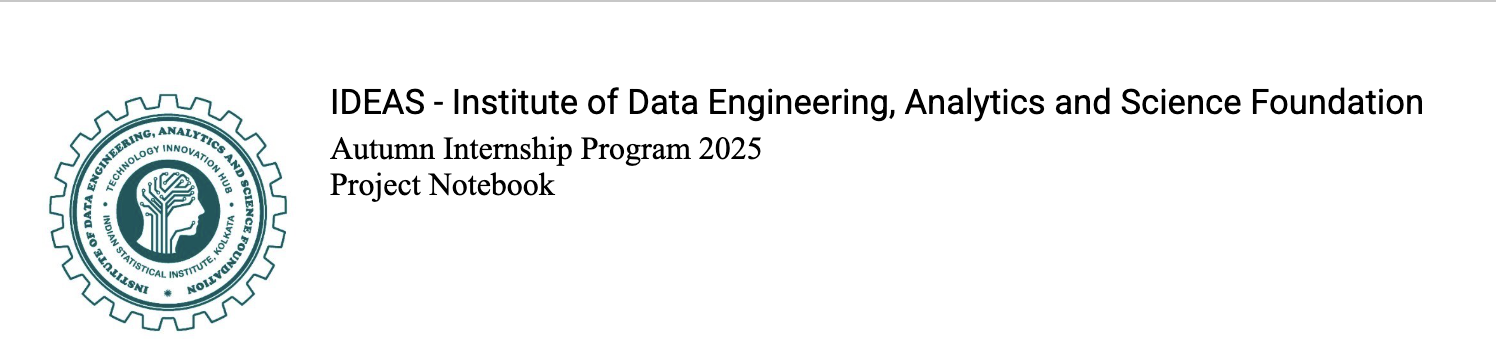

#  Diabetes Prediction: Classification Comparison + Metrics + Evaluation

## Created by: Rounak Biswas
### Designation:

This notebook is structured as an **assignment**. The goal is to build a machine learning workflow for predicting diabetes, compare models, and evaluate them using metrics.

The structure is provided, but you are expected to fill in the details.

##  Problem Statement

You are tasked with building a classification model to predict whether a patient has diabetes based on diagnostic measurements.

- Use the **Pima Indian Diabetes Dataset**.
- Compare multiple classification models.
- Evaluate them using accuracy, precision, recall, F1, ROC-AUC.
- Extend the workflow to a new dataset of your choice.



---


##  Dataset Introduction

The dataset contains medical predictor variables and one target variable (`Outcome`).

- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome (0 = No Diabetes, 1 = Diabetes)


In [62]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, auc, roc_curve



---



##  Data Loading

In [63]:
# Load dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




---



##  Exploratory Data Analysis (EDA)

- Check dataset shape
- Missing values
- Basic statistics
- Correlation heatmap
- Distribution plots


In [64]:
# Basic EDA
print(df.shape)
print(df.info())
df.describe()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
print(f"Number of missing values in the dataset is\n{df.isnull().sum()}")

Number of missing values in the dataset is
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



--- Generating Distribution Plots ---


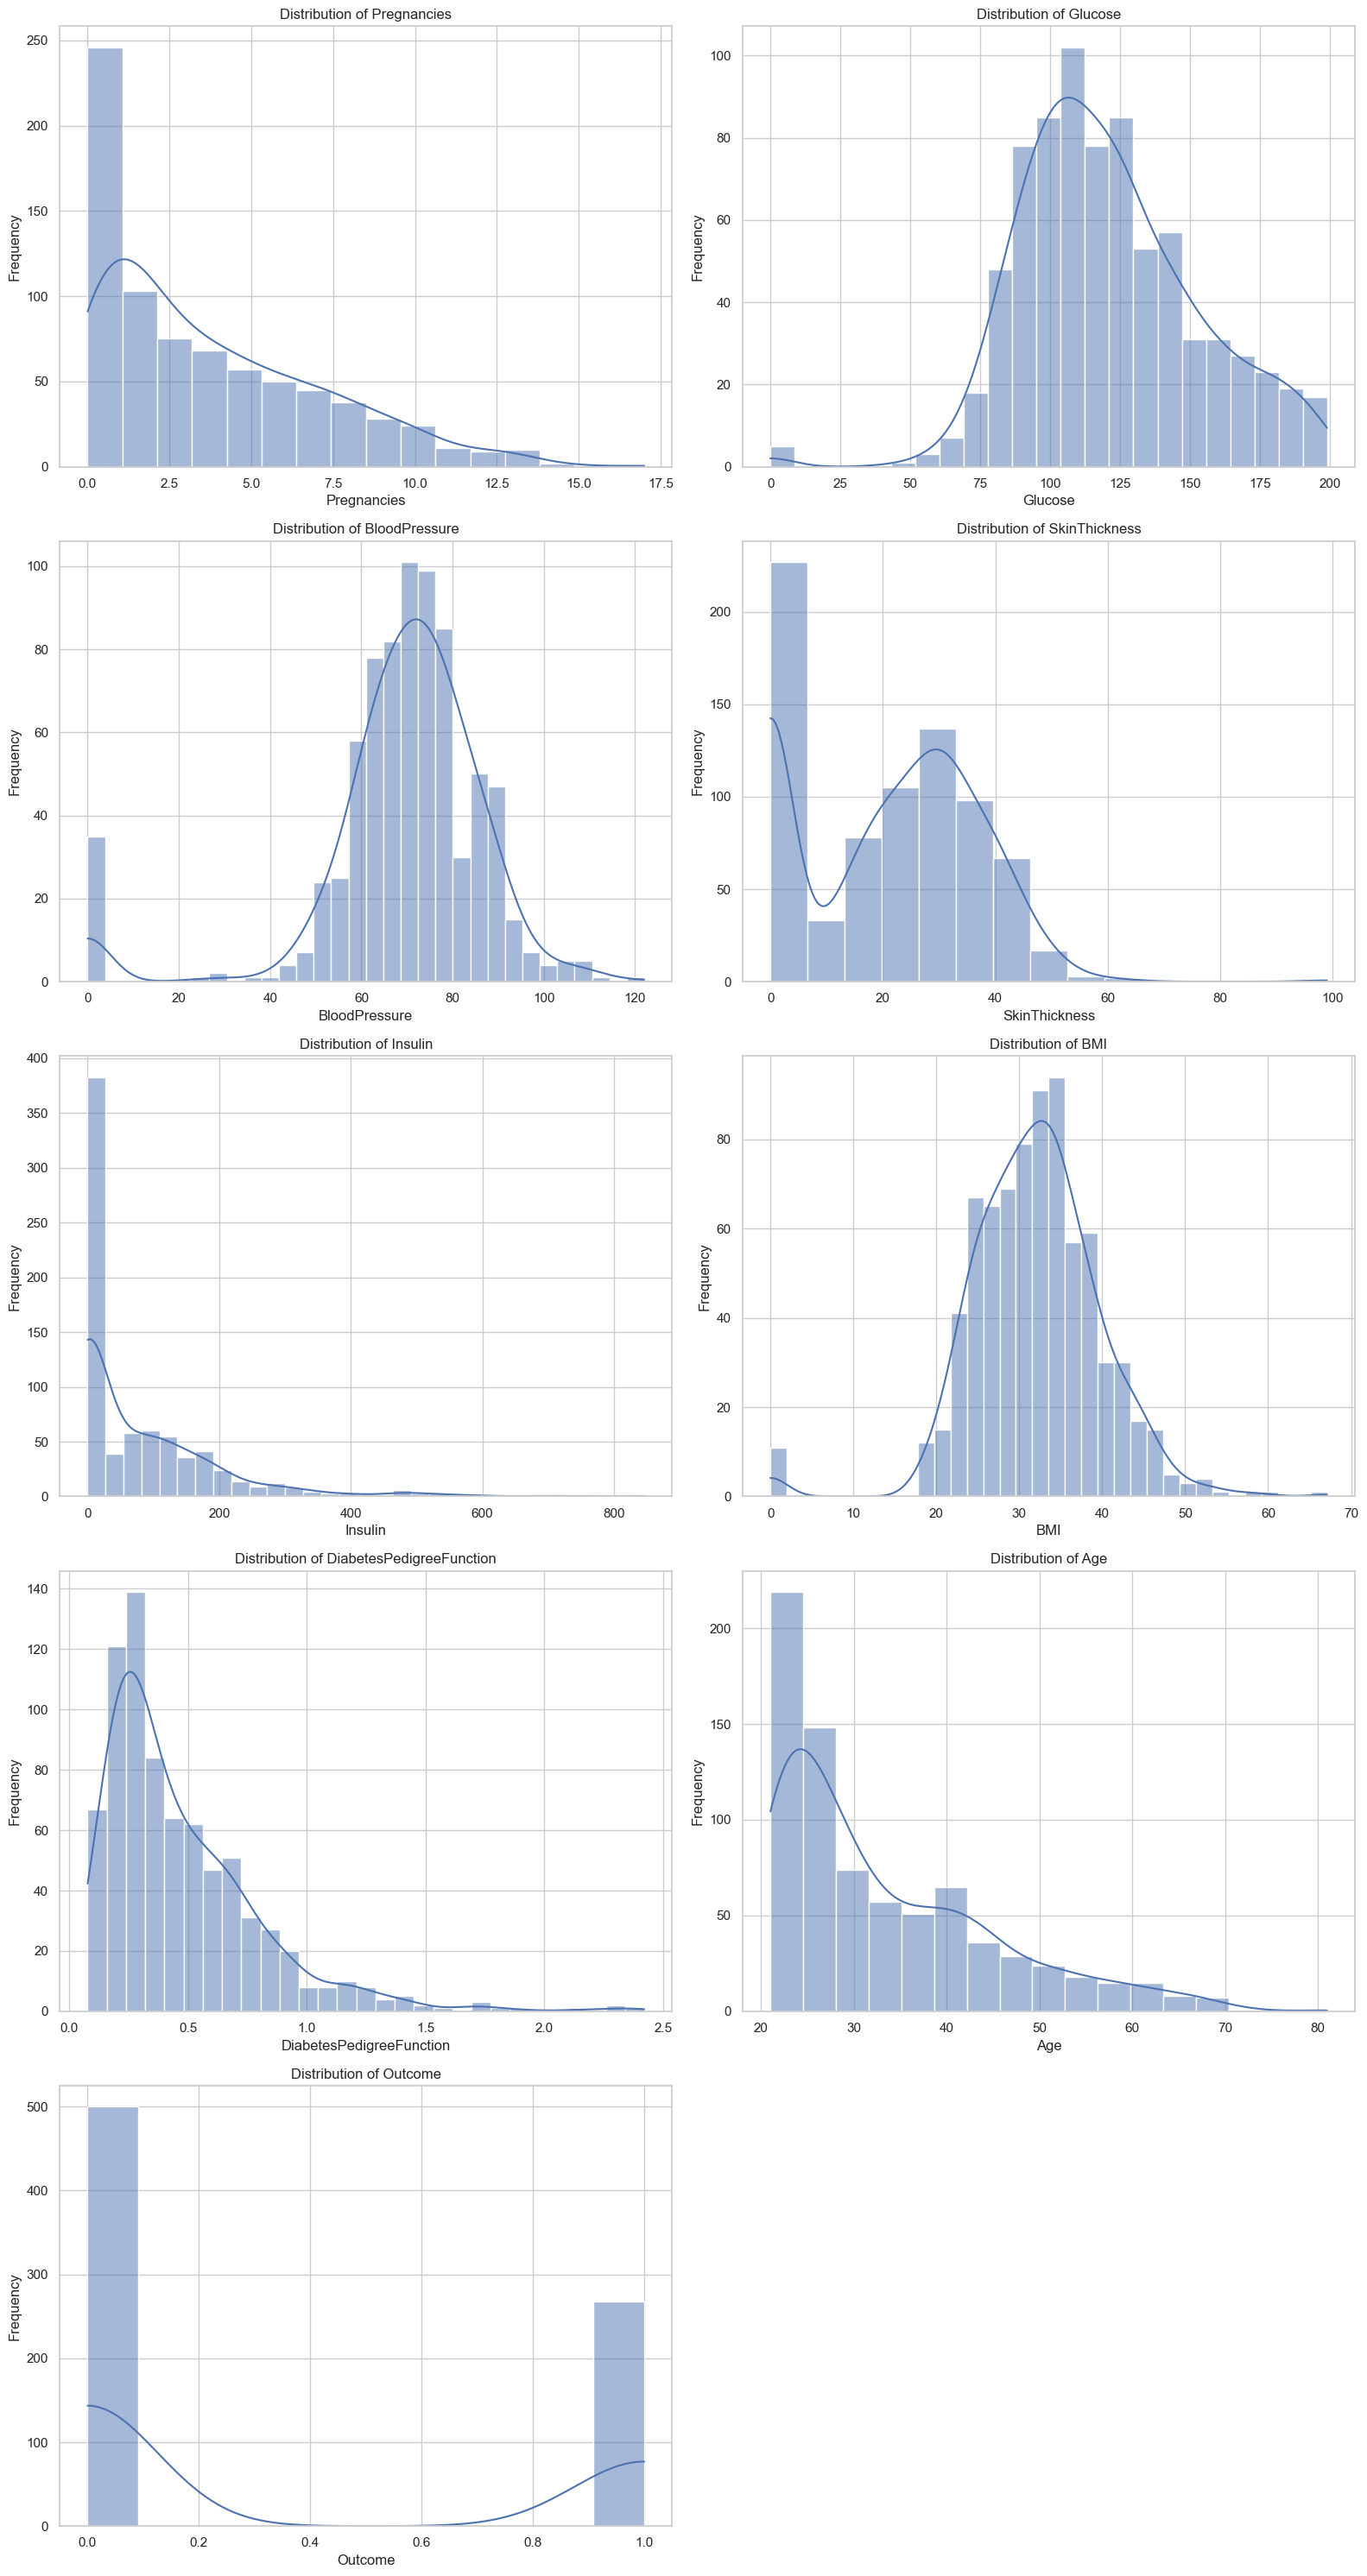

In [66]:
def plot_distributions(df):
    print("\n--- Generating Distribution Plots ---")
    
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    if numeric_cols.empty:
        print("No numeric columns found to plot.")
        return

    # Calculate the number of rows needed for 2 plots per row
    num_plots = len(numeric_cols)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
    
    # Flatten the axes array for easy iteration if there is more than one row
    if num_rows > 1 or num_cols > 1:
        axes = axes.flatten()
    
    # Create a plot for each numeric column
    for i, column in enumerate(numeric_cols):
        sns.histplot(df[column], kde=True, ax=axes[i] if num_plots > 1 else axes)
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)
    
    # Hide any unused subplots
    for i in range(num_plots, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_distributions(df)

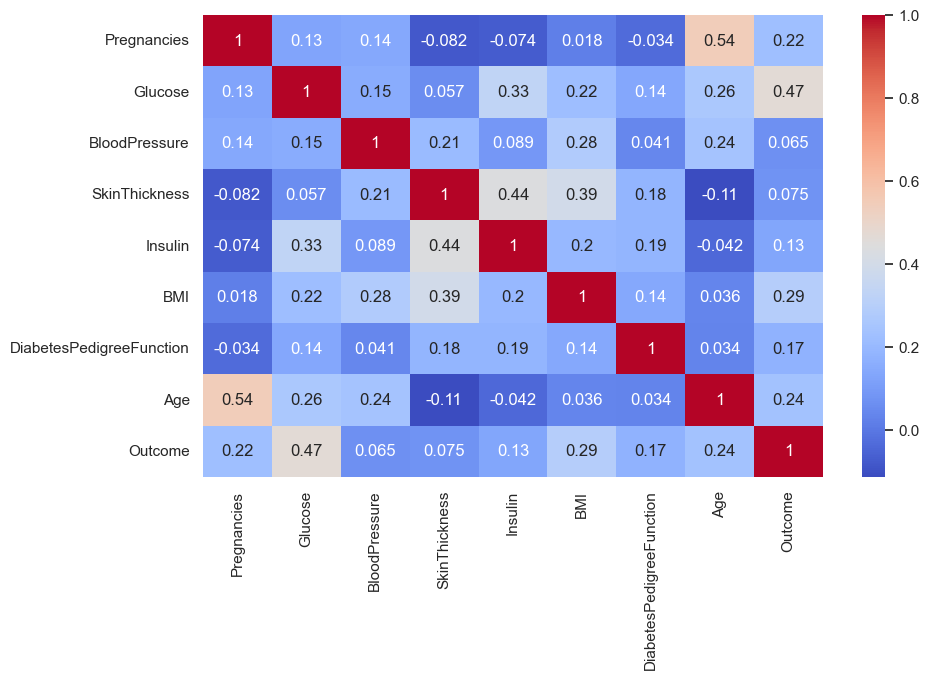

In [67]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



---



##  Data Preprocessing & Train/Test Split

In [68]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)




---



# Data Scaling

In [69]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---



# Machine Learning Models

## KNN Classifier

In [70]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.7012987012987013
[[80 20]
 [26 28]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



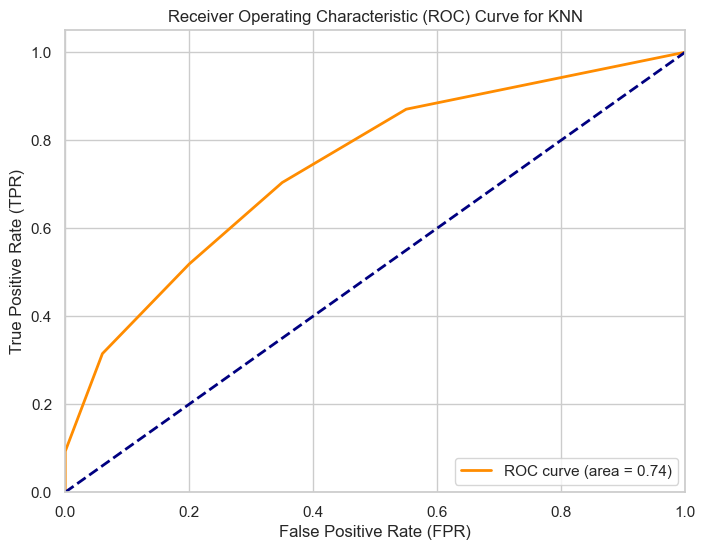

The ROC AUC score for the KNN classifier is: 0.7405


In [71]:
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"The ROC AUC score for the KNN classifier is: {roc_auc:.4f}")

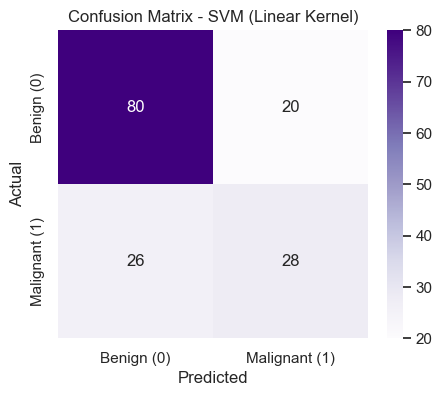

In [72]:
cm = confusion_matrix(y_test, y_pred_knn)

# Plot as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Linear Kernel)')
plt.show()

## Support Vector Machine

In [73]:
# SVM Model
svm = SVC(kernel="linear", random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.7207792207792207
[[83 17]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



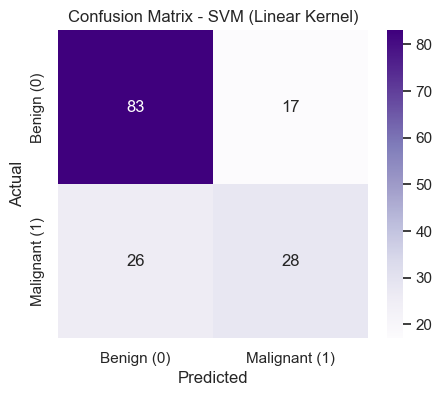

In [74]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Linear Kernel)')
plt.show()

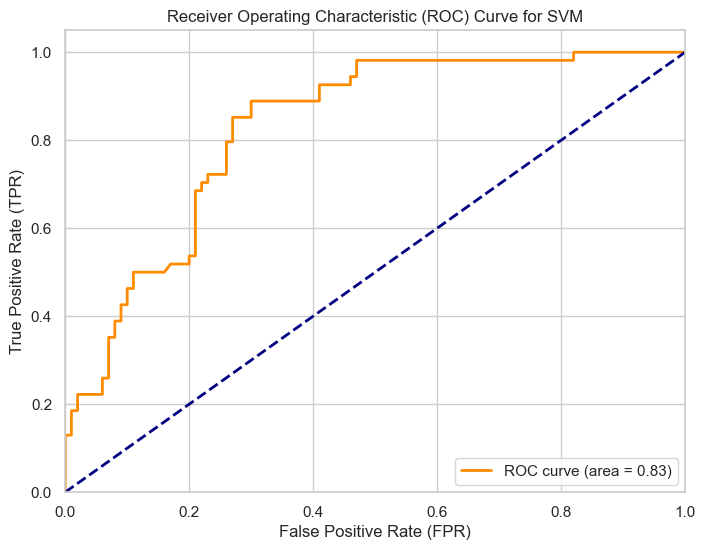

The ROC AUC score for the SVM classifier is: 0.8281


In [75]:
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"The ROC AUC score for the SVM classifier is: {roc_auc:.4f}")

#

###  Evaluation

Compare the models using metrics and visualize results:

- Confusion matrices
- ROC curves
- Metric comparison table




---



##  Apply Workflow on Another Dataset

Repeat the same steps on a dataset of your choice (e.g., Breast Cancer, Titanic, etc.).



---



## Here we will be using the Wisconsin Breast Cancer Dataset to predict breast cancer

In [76]:
df = pd.read_csv(r"D:\breast cancer\breast-cancer.csv")
# print(df.head())      # First 5 rows
print(df.shape)       # Rows and columns
print(df.info())      # Column info
print(df.describe())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

Number of missing values in the dataset is
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

--- Generating 

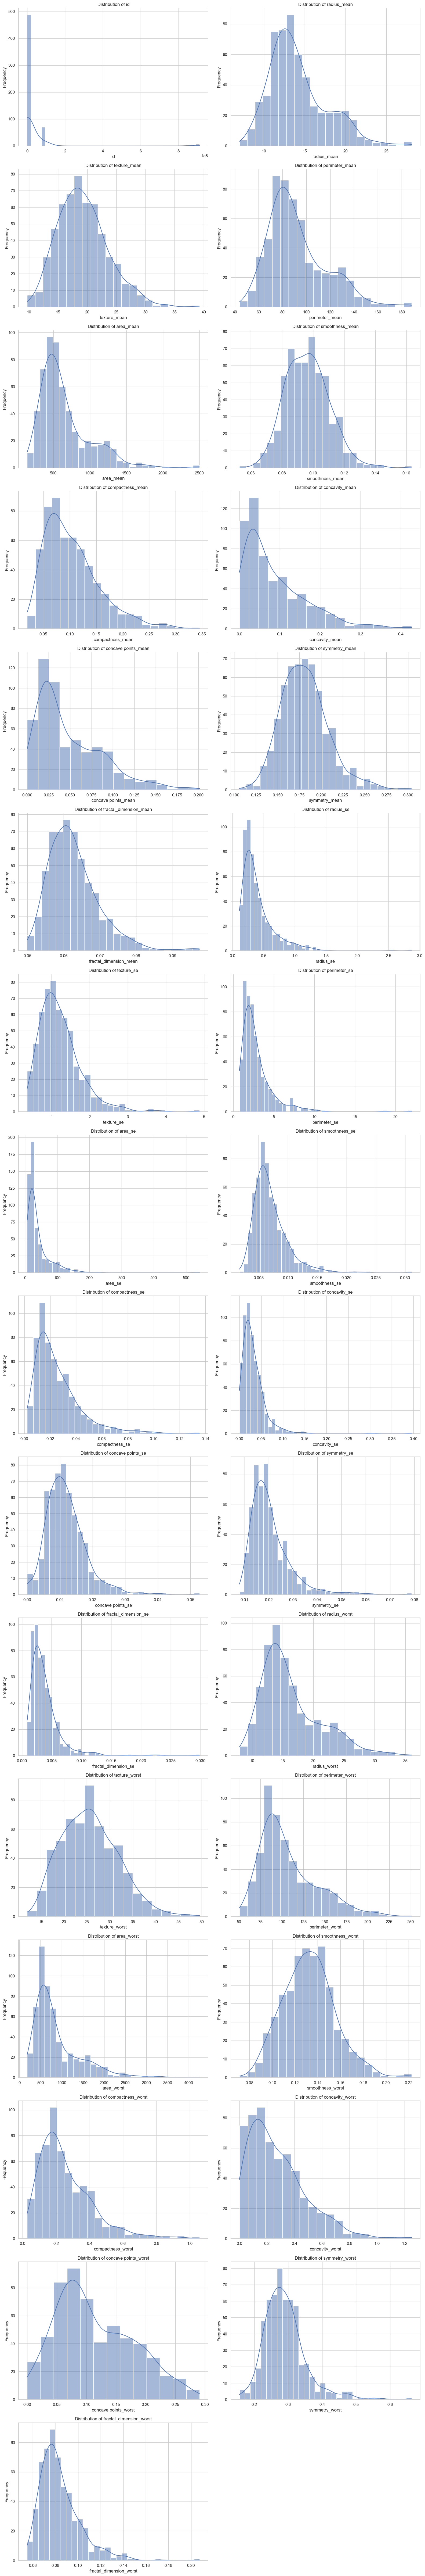

In [77]:
print(f"Number of missing values in the dataset is\n{df.isnull().sum()}")
def plot_distributions(df):
    print("\n--- Generating Distribution Plots ---")
    
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    if numeric_cols.empty:
        print("No numeric columns found to plot.")
        return

    # Calculate the number of rows needed for 2 plots per row
    num_plots = len(numeric_cols)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))
    
    # Flatten the axes array for easy iteration if there is more than one row
    if num_rows > 1 or num_cols > 1:
        axes = axes.flatten()
    
    # Create a plot for each numeric column
    for i, column in enumerate(numeric_cols):
        sns.histplot(df[column], kde=True, ax=axes[i] if num_plots > 1 else axes)
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)
    
    # Hide any unused subplots
    for i in range(num_plots, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_distributions(df)

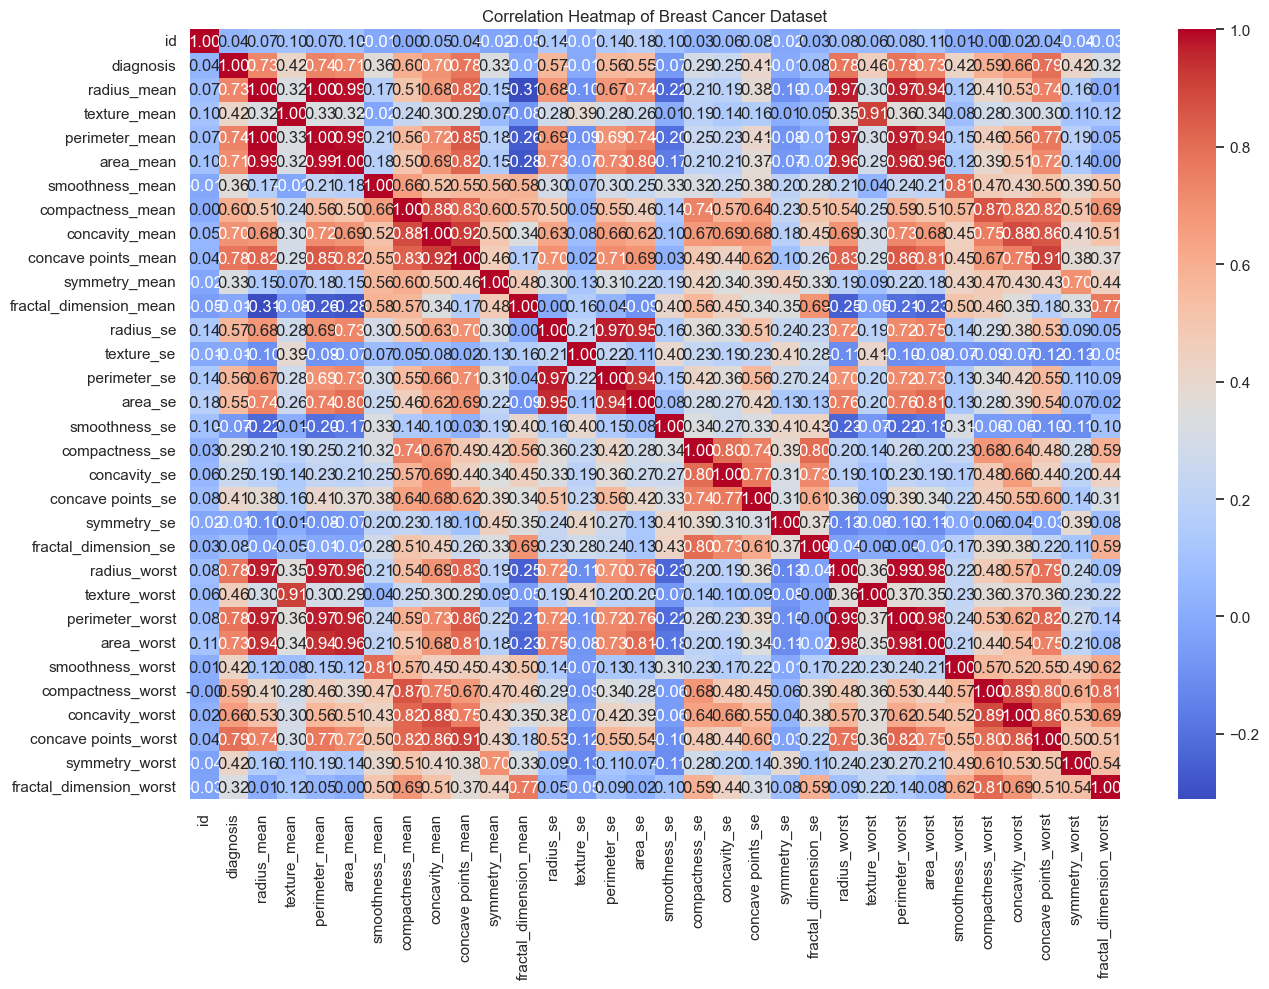

In [78]:
plt.figure(figsize=(15, 10))
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Create heatmap
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()


In [79]:
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (455, 31) (455,)
Test shape: (114, 31) (114,)


In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)  # you can try different k values

# 2. Train the model
knn.fit(X_train_scaled, y_train)

# 3. Predict on the test set
y_pred = knn.predict(X_test_scaled)

# 4. Evaluate the model
print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Results:
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[71  1]
 [ 4 38]]


In [83]:
scores = []

for k in range(1, 21):  # Try k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append((k, acc))

# Show all accuracies
for k, acc in scores:
    print(f"k={k}: accuracy={acc:.4f}")

# Find the best k
best_k = max(scores, key=lambda x: x[1])
print("\nBest k:", best_k[0], "with accuracy:", best_k[1])


k=1: accuracy=0.9298
k=2: accuracy=0.9123
k=3: accuracy=0.9386
k=4: accuracy=0.9474
k=5: accuracy=0.9561
k=6: accuracy=0.9474
k=7: accuracy=0.9561
k=8: accuracy=0.9474
k=9: accuracy=0.9474
k=10: accuracy=0.9474
k=11: accuracy=0.9474
k=12: accuracy=0.9474
k=13: accuracy=0.9474
k=14: accuracy=0.9386
k=15: accuracy=0.9386
k=16: accuracy=0.9386
k=17: accuracy=0.9386
k=18: accuracy=0.9386
k=19: accuracy=0.9386
k=20: accuracy=0.9386

Best k: 5 with accuracy: 0.956140350877193


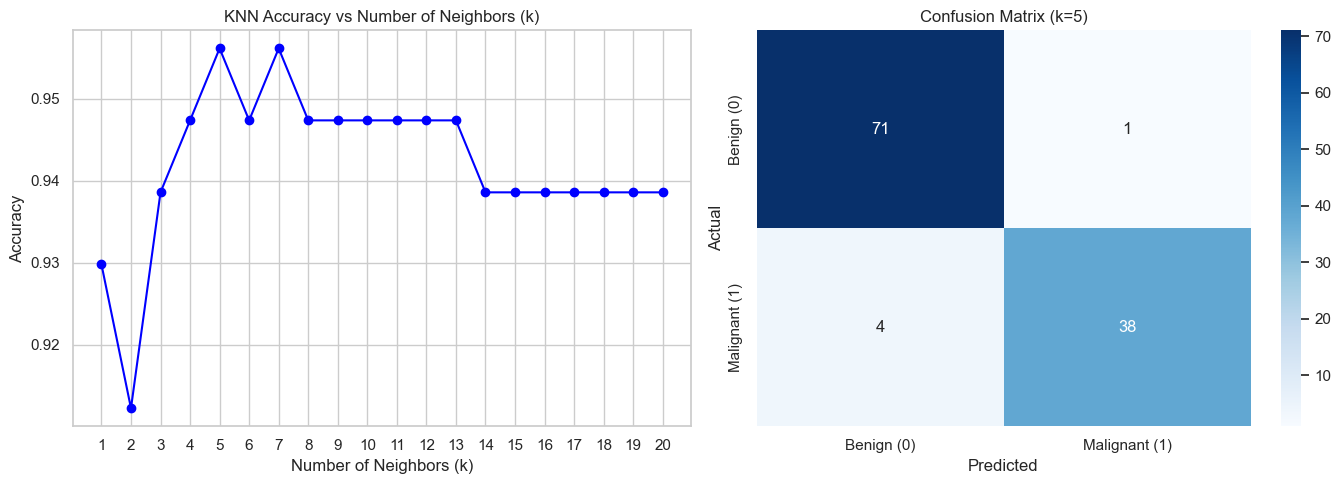

In [84]:
# --- 1. Accuracy vs k ---
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# --- 2. Train final model with best k ---
best_k = k_values[accuracies.index(max(accuracies))]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# --- 3. Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- 4. Plot both together ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: accuracy vs k
axes[0].plot(k_values, accuracies, marker='o', color='blue')
axes[0].set_title('KNN Accuracy vs Number of Neighbors (k)')
axes[0].set_xlabel('Number of Neighbors (k)')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(k_values)
axes[0].grid(True)

# Right: confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            ax=axes[1])
axes[1].set_title(f'Confusion Matrix (k={best_k})')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


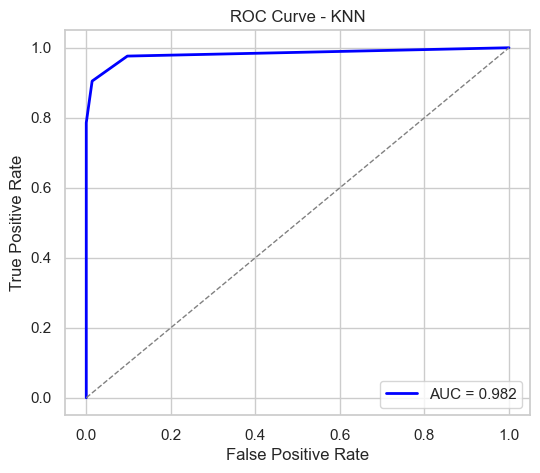

In [85]:
y_prob = knn_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot with Seaborn style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 5))

plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # diagonal

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()


In [86]:
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.9649122807017544
[[72  0]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



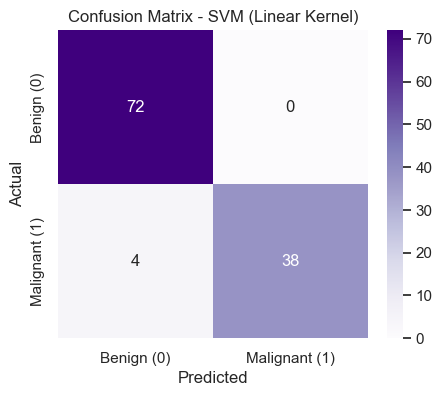

In [87]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot as heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Linear Kernel)')
plt.show()


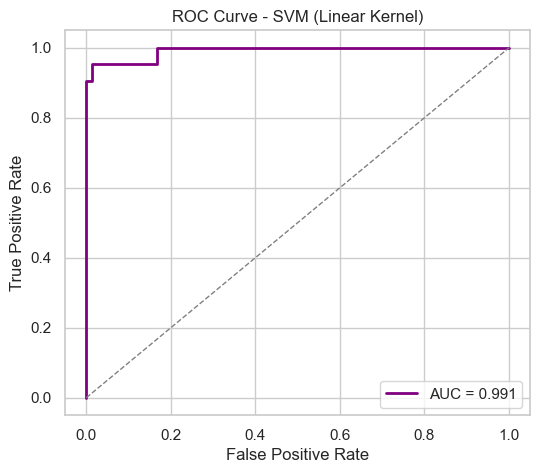

In [88]:
y_scores = svm.decision_function(X_test_scaled)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot with Seaborn style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 5))

plt.plot(fpr, tpr, color='purple', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Linear Kernel)')
plt.legend(loc='lower right')
plt.show()

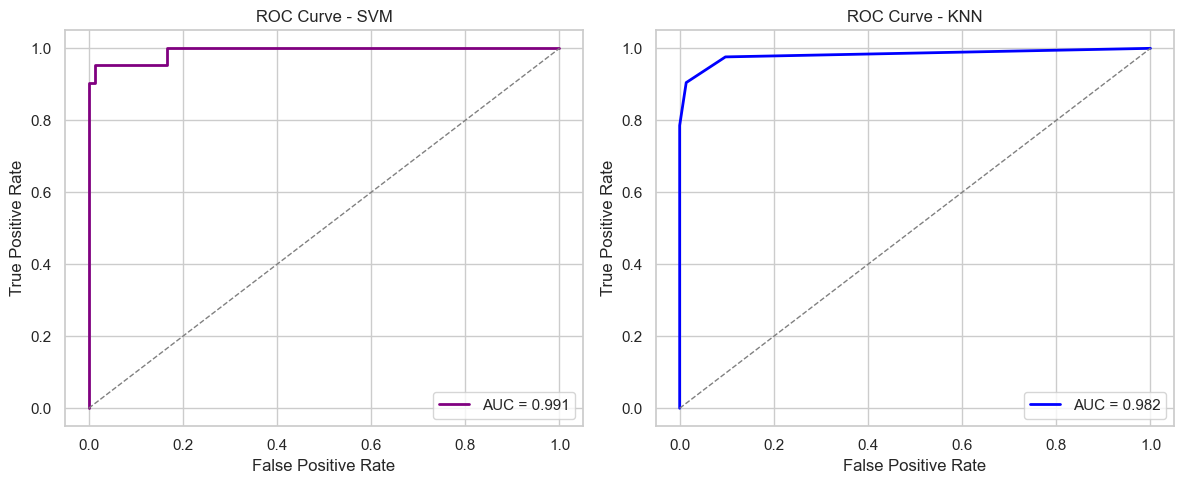

In [89]:


sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# ---- SVM ROC ----
y_scores_svm = svm.decision_function(X_test_scaled)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

axes[0].plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'AUC = {roc_auc_svm:.3f}')
axes[0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - SVM')
axes[0].legend(loc='lower right')

# ---- KNN ROC ----
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

axes[1].plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'AUC = {roc_auc_knn:.3f}')
axes[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - KNN')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()
